# Linear Regression


Our goal is to build a model which predicts sales based on the money spent on different platforms for marketing. We will use the advertising dataset analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model. 
In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Reading and Understanding the Data

In [2]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.DataFrame(pd.read_csv("advertising.csv"))
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Inspection

In [ ]:
# show the shape of the data

In [ ]:
# show a short summary of  dataframe

In [ ]:
# Show Statistical Summary of data

## Data Cleaning

In [ ]:
# Check if data has null values
data.isnull().sum()*100/data.shape[0]

## What is our target varibale
The variable we want to predict is sales, in next plot we will show a boxplot of the sales

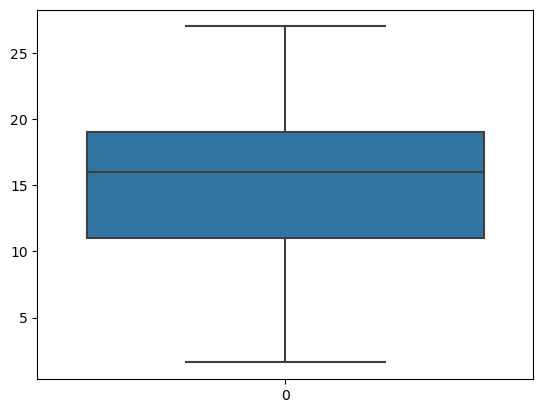

In [5]:
sns.boxplot(data['Sales'])
plt.show()

We will generate a heatmap that represents the correlation between the different variables in the dataset

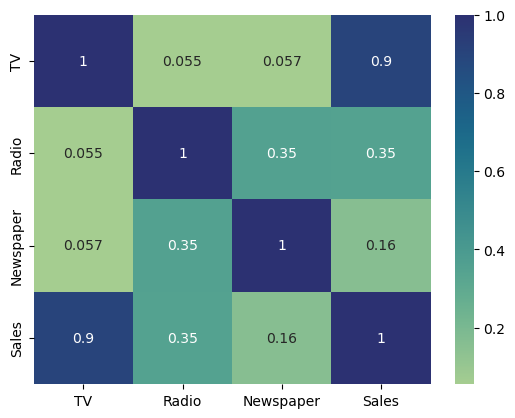

In [8]:
# Let's see the correlation between different variables.
sns.heatmap(data.corr(),annot=True,cmap="crest")
plt.show()

It can be seen from the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

## Model Building

### Performing Simple Linear Regression
Let's prepare the dependent and targeted varibales

In [12]:
X = data['TV']
y = data['Sales']

## Training and Testing Data Split
You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [14]:
# Let's now take a look at the train dataset
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [15]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

#### Building a Linear Model
You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [17]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below.

Remember, any line drawn on Cartesian plane can be represented using this equation
###  $y = m \cdot x + b$

In [21]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
LinearReg = sm.OLS(y_train, X_train_sm).fit()

# show the parameters that we are looking for
LinearReg.params


const    6.948683
TV       0.054546
dtype: float64


## What is OLS? What is the output of the training.
OLS = ordinary least sequare, it is a method of choosing the parameters that minimize the errors between dependent variables and the output of the model.



$ Sales =  0.054 \times TV + 6.948  $

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

## Model Evaluation
Now, we will examin our model. Specifically, we will pass `X_test` to our model and see how it performs. Then we will compare it to what we already have.  

In [ ]:
y_train_pred = LinearReg.predict(X_train_sm)
res = (y_train - y_train_pred)

### Predictions on the Test Set

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = LinearReg.predict(X_test_sm)

## How to judge the error you got